# Importing libraries

Importing libraries for managing the data

In [1]:
import pandas as pd
import numpy as np

Library for splitting the data into training and testing data

In [2]:
from sklearn.model_selection import train_test_split

Library for plotting graphs

In [3]:
import matplotlib.pyplot as plt

Library for explaining predictions

In [4]:
import shap

Importing library that allows us to use Extreme Gradiant Boosting Regression algorithm

In [5]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree

Library for visualizing partial dependence plots

In [39]:
from sklearn.inspection import PartialDependenceDisplay

Importing library that allows us to use a Random Forest Regression model

In [6]:
from sklearn.ensemble import RandomForestRegressor

Libraries for using tensorflow (neural network algorithm)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization

Prediction evaluation libraries

In [8]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

Library that allows us to scale the features of our data (important for neural networks)

In [9]:
from sklearn.preprocessing import StandardScaler

# Loading data

File "bikesRentedPerHourCombinedData.csv" contains hourly data from the autumn of 2010 to the autumn of 2024. It lists how many bike rides were done on a certain hour and also the weather conditions.

In [10]:
data = pd.read_csv("bikesRentedPerHourCombinedData.csv")

In [11]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2010-09-20 11:00:00,2,0,1,1,23.1,21.2,34.0,13.0,2
1,2010-09-20 12:00:00,2,0,1,1,24.3,22.7,30.0,12.6,17
2,2010-09-20 13:00:00,2,0,1,1,25.1,23.5,29.0,12.6,11
3,2010-09-20 14:00:00,2,0,1,1,25.4,23.6,30.0,12.8,6
4,2010-09-20 15:00:00,2,0,1,1,25.6,23.2,30.0,13.0,12
...,...,...,...,...,...,...,...,...,...,...
123728,2024-10-31 19:00:00,3,0,1,1,21.8,20.6,65.0,18.8,1561
123729,2024-10-31 20:00:00,3,0,1,1,22.3,20.7,61.0,20.4,1249
123730,2024-10-31 21:00:00,3,0,1,1,21.9,20.2,61.0,20.4,1182
123731,2024-10-31 22:00:00,3,0,1,1,21.5,19.6,61.0,20.9,939


# Creating new columns

Converting *object* type "*datetime*" column into *datetime* type. This is important because then we can divide that column into more descriptive columns

In [12]:
data["datetime"] = pd.to_datetime(data["datetime"])

Splitting "*datetime*" column into "*year*", "*month*", "*day*" and "*hour*" columns

In [13]:
datetime = data["datetime"]

data["year"] = datetime.dt.year
data["month"] = datetime.dt.month
data["day"] = datetime.dt.day
data["hour"] = datetime.dt.hour

Creating a "*dayofweek*" column to improve the performance of the machine learning model

In [14]:
data["dayofweek"] = datetime.dt.dayofweek

In [15]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,2010-09-20 11:00:00,2,0,1,1,23.1,21.2,34.0,13.0,2,2010,9,20,11,0
1,2010-09-20 12:00:00,2,0,1,1,24.3,22.7,30.0,12.6,17,2010,9,20,12,0
2,2010-09-20 13:00:00,2,0,1,1,25.1,23.5,29.0,12.6,11,2010,9,20,13,0
3,2010-09-20 14:00:00,2,0,1,1,25.4,23.6,30.0,12.8,6,2010,9,20,14,0
4,2010-09-20 15:00:00,2,0,1,1,25.6,23.2,30.0,13.0,12,2010,9,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123728,2024-10-31 19:00:00,3,0,1,1,21.8,20.6,65.0,18.8,1561,2024,10,31,19,3
123729,2024-10-31 20:00:00,3,0,1,1,22.3,20.7,61.0,20.4,1249,2024,10,31,20,3
123730,2024-10-31 21:00:00,3,0,1,1,21.9,20.2,61.0,20.4,1182,2024,10,31,21,3
123731,2024-10-31 22:00:00,3,0,1,1,21.5,19.6,61.0,20.9,939,2024,10,31,22,3


# Removing unnecessary columns

Removing "*datetime*" column, since machine learning models usually can't read it. We already converted and divided it into appropriate columns.

In [16]:
data_modified = data.drop("datetime", axis=1)

Removing "*day*" column because it causes overfitting. Instead "*holiday*", "*workingday*" and "*dayofweek*" columns are much better to describe the daily data.

In [17]:
data_modified.drop("day", inplace=True, axis=1)

We removed early years (2010–2012) due to the low volume of bike rides compared to the rest of the dataset. Additionally, we excluded the pandemic years (2020–2021) as they experienced significant movement restrictions due to COVID-19, which could confuse the model. If future predictions include scenarios with similar restrictions in Los Angeles, we should consider adding a new feature, such as "*is_moving_restricted*", to capture this context.

In [18]:
years_to_remove = [2010, 2011, 2012, 2020, 2021]
data_modified = data_modified[~data_modified['year'].isin(years_to_remove)]

# Modifying "*year*" column

The model's performance is unaffected by whether the years start from 2013 or 0. For simplicity, we adjusted the dataset so that the year starts from 0 by subtracting 2013.

In [19]:
data_modified["year"] = data_modified["year"] - 2013

# Splitting data for training and testing

Splitting data into features (X) and target (y)

In [20]:
X = data_modified.drop("count", axis=1)
y = data_modified["count"]

Splitting data into training and testing sets. Training set is for training the models and testing set is for evaluating the models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training an extreme gradiant boosting (XGBoost) regression model

Calculating the mean of the y_target. This is the base score that the XGBoost regression model starts predicting from

In [22]:
base_score = np.mean(y_train)

Creating the model and training it

In [23]:
xgb_model = XGBRegressor(objective="count:poisson", base_score=base_score, random_state=0)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=415.92946756204043, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='count:poisson', ...)

# Analysing the XGBoost model

## Plotting feature importance

Gain: Measures how much each feature contributes to reducing loss (improvement in accuracy).

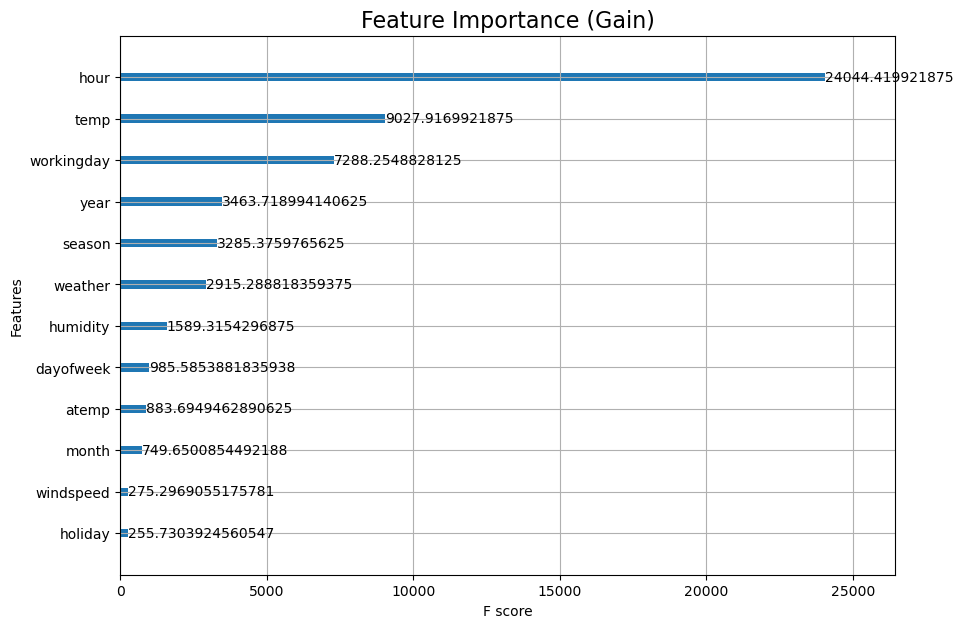

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_importance(xgb_model, importance_type='gain', ax=ax)
ax.set_title('Feature Importance (Gain)', fontsize=16)

plt.savefig('./model_analysation_plots/feature_importance_gain.png', dpi=300)
plt.show()
plt.close(fig)

Weight: Counts how often a feature is used in the decision trees.

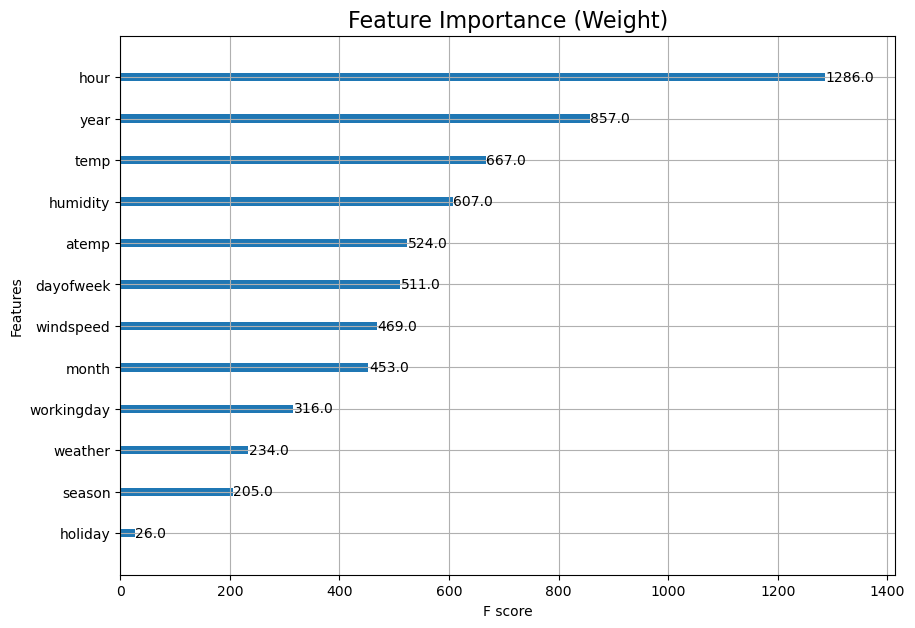

In [71]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_importance(xgb_model, ax=ax)
ax.set_title('Feature Importance (Weight)', fontsize=16)

plt.savefig('./model_analysation_plots/feature_importance_weight.png', dpi=300)
plt.show()
plt.close(fig)

Cover: Measures the proportion of observations impacted by a feature.

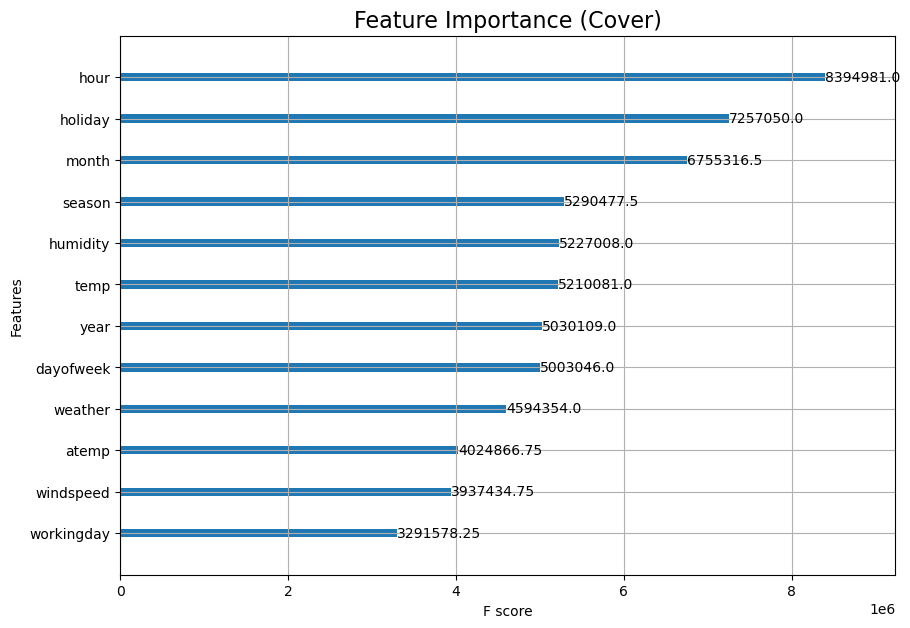

In [72]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_importance(xgb_model, importance_type='cover', ax=ax)
ax.set_title('Feature Importance (Cover)', fontsize=16)

plt.savefig('./model_analysation_plots/feature_importance_cover.png', dpi=300)
plt.show()
plt.close(fig)

## SHAP (SHapley Additive exPlanatations)

Shap provides explanations for how each feature contributes to a specific prediction, including the direction and magnitude of influence

In [26]:
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

100%|===================| 68876/68947 [10:16<00:00]        

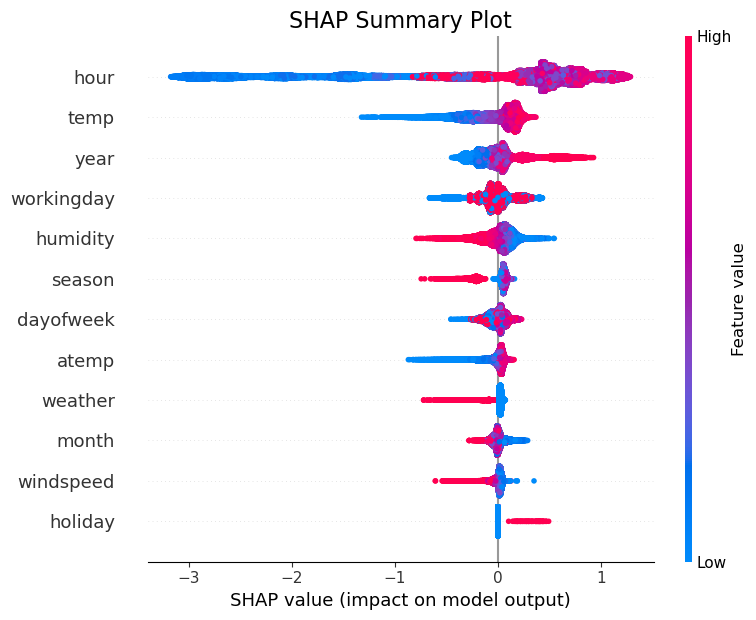

In [70]:
fig_summary = plt.figure()
shap.summary_plot(shap_values, X_train, show=False)
plt.title('SHAP Summary Plot', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('./model_analysation_plots/shap_summary_plot.png', dpi=300)  # Save to file
plt.show()
plt.close(fig_summary)

Force plot: Visualizing individual predictions

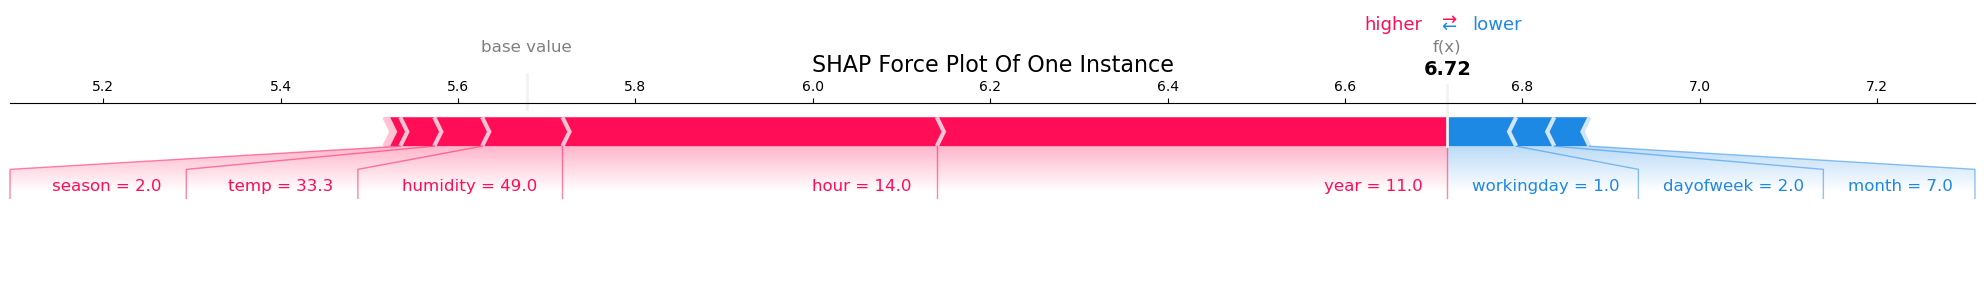

In [69]:
shap.force_plot(
    explainer.expected_value,
    shap_values[-24].values,
    X_train.iloc[-24],
    show=False,
    matplotlib=True
)
plt.title('SHAP Force Plot Of One Instance', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1.1])
plt.savefig('./model_analysation_plots/shap_force_plot.png', dpi=300)
plt.show()

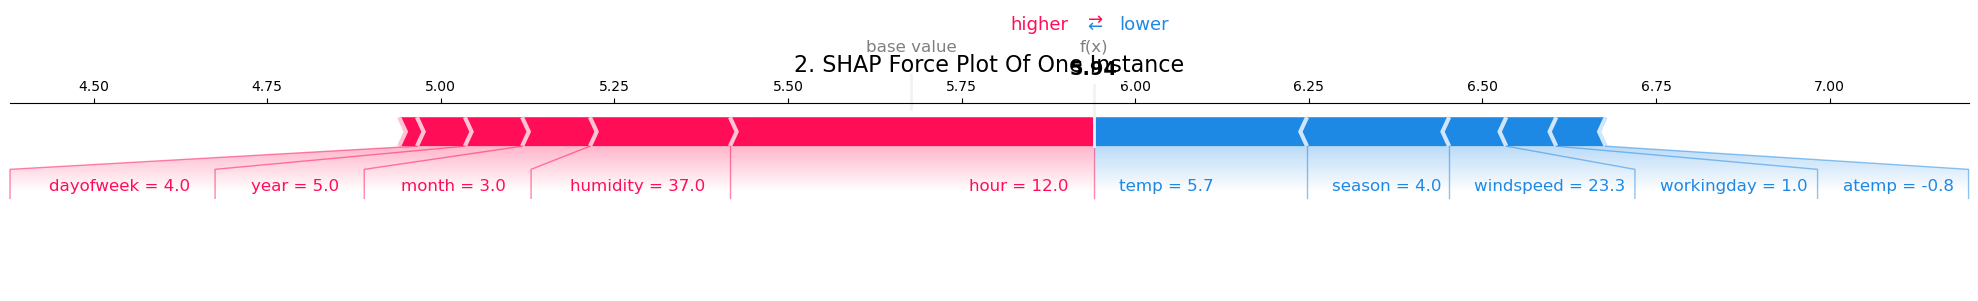

In [74]:
shap.force_plot(
    explainer.expected_value,
    shap_values[-50].values,
    X_train.iloc[-50],
    show=False,
    matplotlib=True
)
plt.title('2. SHAP Force Plot Of One Instance', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1.1])
plt.savefig('./model_analysation_plots/shap_force_plot_2.png', dpi=300)
plt.show()

## Visualizing decision trees

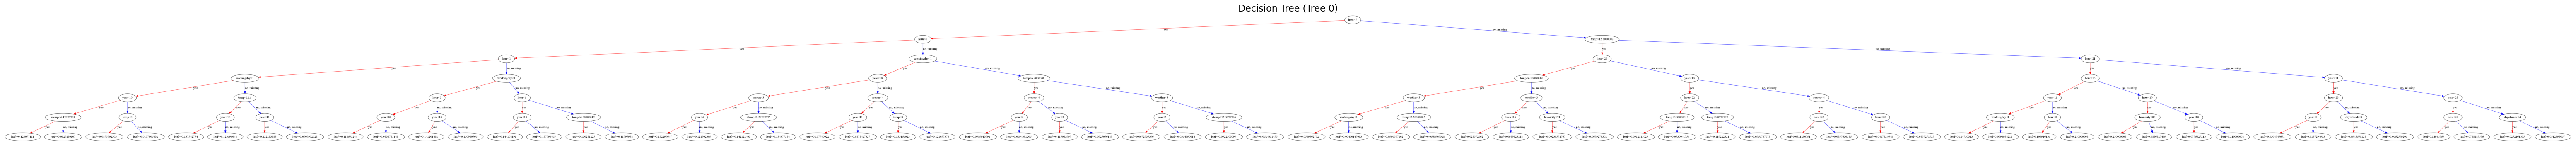

In [35]:
fig, ax = plt.subplots(figsize=(80, 20))
plot_tree(xgb_model, num_trees=0, ax=ax)
ax.set_title('Decision Tree (Tree 0)', fontsize=16)

plt.savefig('./model_analysation_plots/decision_tree.png', dpi=400)
plt.show()
plt.close(fig)

## Partial Dependence Plots (PDP)
PDPs show the relationship between a feature and the predicted outcome while marginalizing over other features. These plots help illustrate how changes in one feature affect the model's predictions.

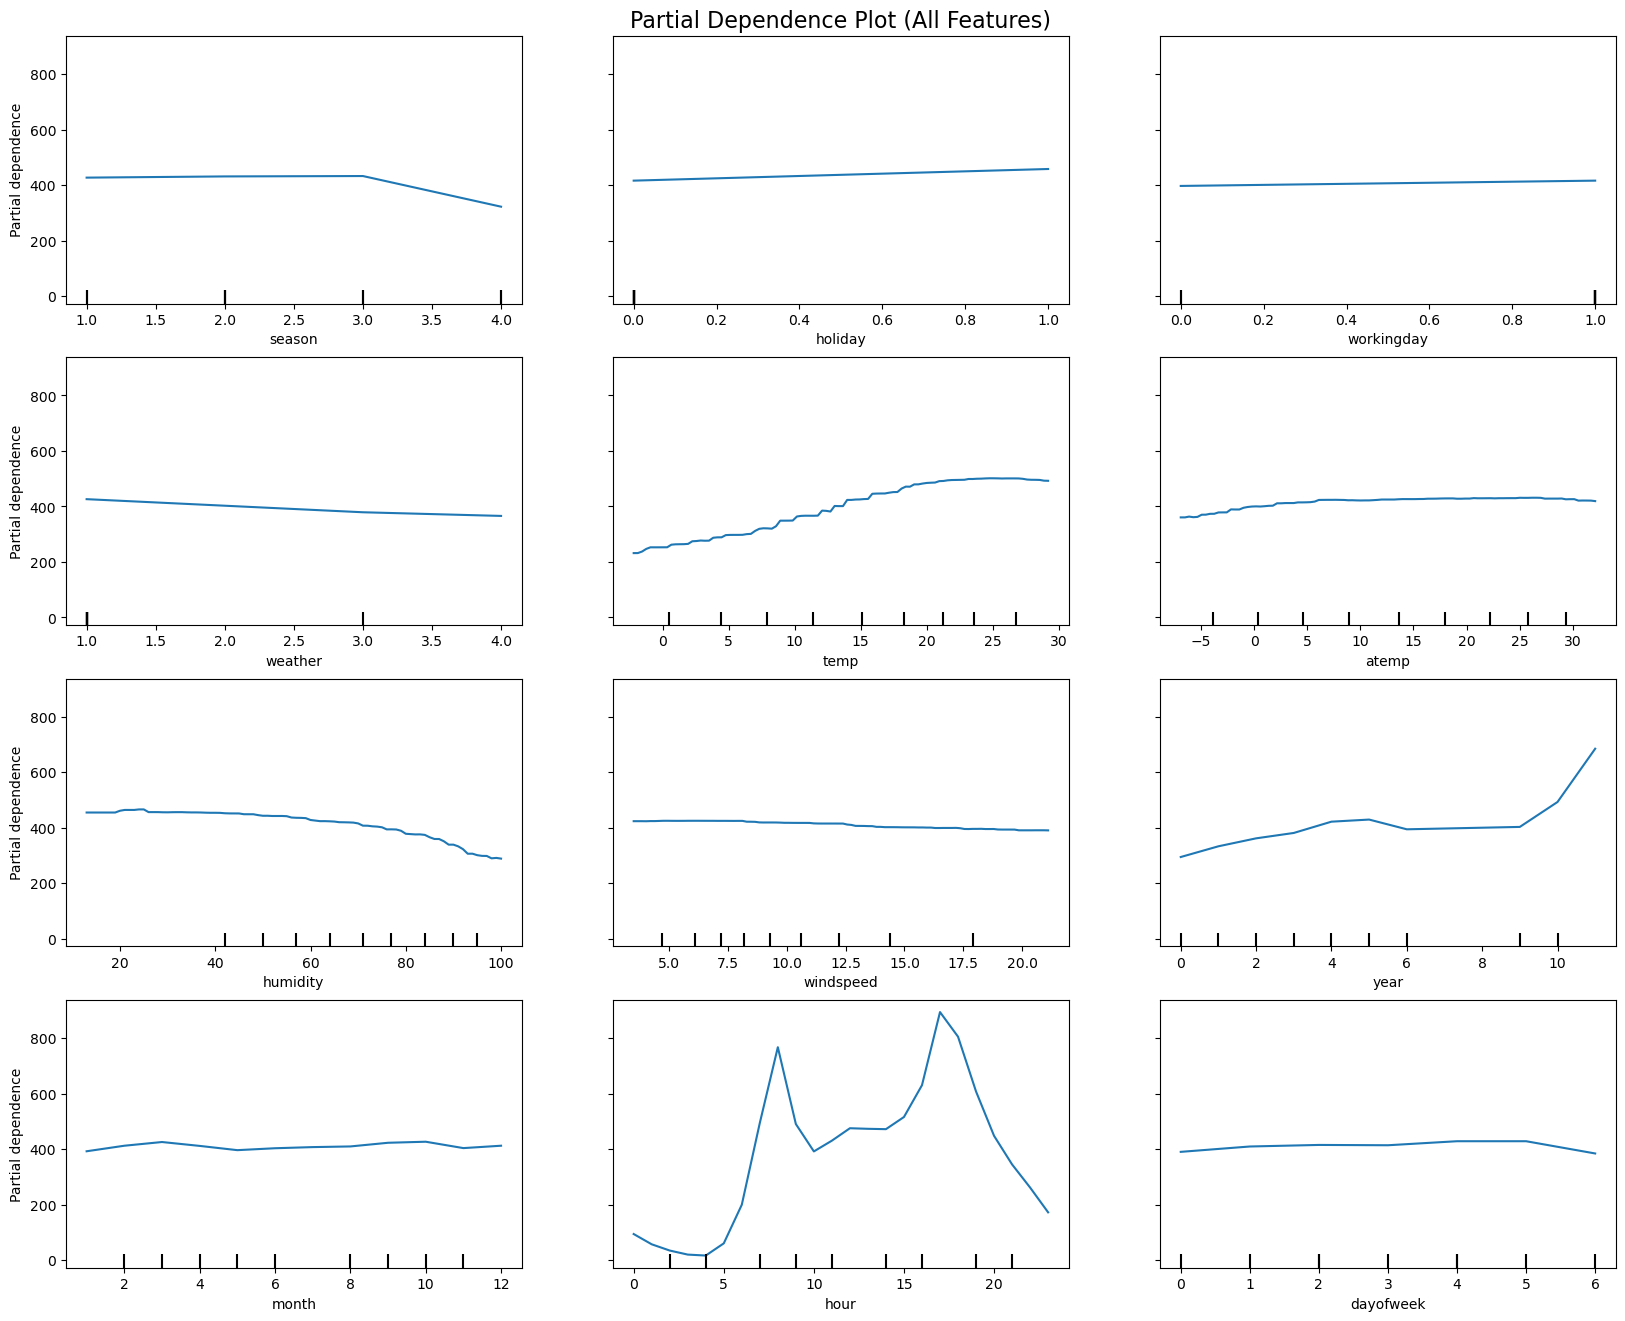

In [51]:
features = X_train.columns

fig, ax = plt.subplots(figsize=(20, 16))
PartialDependenceDisplay.from_estimator(xgb_model, X_train, features, ax=ax)

ax.set_title('Partial Dependence Plot (All Features)', fontsize=16)

plt.savefig('./model_analysation_plots/partial_dependence_plot_all_features.png', dpi=300)
plt.show()
plt.close(fig)

As seen from the plots above, hour, temperature and year columns are the most influential features. Also humidity and workingday are also quite important for the algorithm.

# Evaluating the XGBoost model

Calculating variance

In [22]:
variance = np.var(y_test)
print(f"Variance: {variance}")

Variance: 165408.03545859834


Calculating a baseline prediction

In [23]:
baseline_pred = np.full_like(y_test, np.mean(y_train))
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline mean squared error: {baseline_mse}")

Baseline mean squared error: 165412.25990601612


Predicting test data

In [24]:
y_pred = xgb_model.predict(X_test)

Calculating model's mean squared error

In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Model's mean squared error: {mse}")

Model's mean squared error: 9505.974453519078


Considering the variance of the test set and the baseline mean squared error, the model's mean squared error is significantly lower, indicating that the model performs satisfactorily and provides meaningful predictions compared to the baseline.

Calculating model's mean squared logarithmic error

In [26]:
msle = mean_squared_log_error(y_test, y_pred)
print(f"Model's mean squared logarithmic error: {msle}")

Model's mean squared logarithmic error: 0.15937568466626098


Calculating model's root mean squared logarithmic error

In [27]:
rmsle = np.sqrt(msle)
print(f"Model's root mean squared logarithmic error: {rmsle}")

Model's root mean squared logarithmic error: 0.39921884307514965


# Preparing data for random forest regression model

One hot encoding categorical columns

In [28]:
one_hot_encoded_columns = ["season", "weather", "dayofweek"]

for feature in one_hot_encoded_columns:
    one_hot_encoded_feature = pd.get_dummies(data_modified[feature], prefix=feature)
    data_modified = pd.concat([data_modified, one_hot_encoded_feature], axis=1)
    data_modified.drop(feature, inplace=True, axis=1)

# Splitting data for training and testing

Splitting data into features (X) and target (y)

In [29]:
X = data_modified.drop("count", axis=1)
y = data_modified["count"]

Splitting data into training and testing sets. Training set is for training the models and testing set is for evaluating the models

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training a random forest regression model

Creating a model and training it. We also used gridsearch for hyperparameter tuning (in *kaggle_model.ipynb*), but found best results by just using default parameters.

In [31]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

# Evaluating the random forest regression model

Predicting test data

In [32]:
y_pred = rf.predict(X_test)

Calculating model's mean squared error

In [33]:
mse = mean_squared_error(y_test, y_pred)
print(f"Model's mean squared error: {mse}")

Model's mean squared error: 10232.046128995764


Calculating model's mean squared logarithmic error

In [34]:
msle = mean_squared_log_error(y_test, y_pred)
print(f"Model's mean squared logarithmic error: {msle}")

Model's mean squared logarithmic error: 0.15992544220366622


Calculating model's root mean squared logarithmic error

In [35]:
rmsle = np.sqrt(msle)
print(f"Model's root mean squared logarithmic error: {rmsle}")

Model's root mean squared logarithmic error: 0.3999067918948942


# Training a tensorflow model

In [36]:
X_tf = X.copy()

We applied a cyclical transformation to the "*month*" and "*hour*" columns to capture their periodic nature. This is important because certain values, such as hours 23 and 0, or months December and January, are as close to each other as any other consecutive values. Without this transformation, their relationship would not be properly represented in the model.

The transformation uses sine and cosine functions to map these cyclical values onto a continuous circle, ensuring the model can interpret their periodicity. The original month and hour columns were dropped after the transformation.

In [37]:
X_tf["hour_sin"] = np.sin(2 * np.pi * X_tf["hour"] / 24)
X_tf["hour_cos"] = np.cos(2 * np.pi * X_tf["hour"] / 24)

X_tf["month_sin"] = np.sin(2 * np.pi * X_tf["month"] / 12)
X_tf["month_cos"] = np.cos(2 * np.pi * X_tf["month"] / 12)

In [38]:
X_tf.drop(["month", "hour"], inplace=True, axis=1)

We scaled the features to standardize them with a mean of 0 and a standard deviation of 1. This is essential for TensorFlow models, as neural networks are sensitive to the scale of input data. Without scaling, training can be slower, less stable, and biased toward features with larger magnitudes.

In [39]:
scaler = StandardScaler()
X_tf = scaler.fit_transform(X_tf)

In [40]:
y_tf = np.array(y).reshape(-1, 1)

Splitting data into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y_tf, test_size=0.2, random_state=0)

Creating the model. To ensure predictions are always 0 or positive, we use an exponential activation function in the final layer. The model includes multiple dense layers with ReLU activation, batch normalization for stability, and dropout for regularization.

In [42]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(1, activation='exponential')
])

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Creating an early stopping function to prevent overfitting during training

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Creating a function to reduce learning rate every 10 epochs.

In [45]:
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.9  # Reduce by 10% every 10 epochs
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)

Training the model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule],
    verbose=1
)

Epoch 1/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 288060.5625 - mae: 370.7872 - val_loss: 80117.3594 - val_mae: 187.2092 - learning_rate: 0.0010
Epoch 2/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 91951.2969 - mae: 204.6342 - val_loss: 59546.0117 - val_mae: 156.3412 - learning_rate: 0.0010
Epoch 3/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 52235.6836 - mae: 151.0908 - val_loss: 33081.6445 - val_mae: 115.0964 - learning_rate: 0.0010
Epoch 4/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 40944.2305 - mae: 133.2838 - val_loss: 25572.0469 - val_mae: 102.7198 - learning_rate: 0.0010
Epoch 5/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 35487.2930 - mae: 123.9404 - val_loss: 21329.6484 - val_mae: 92.3445 - learning_rate: 0.0010
Epoch 6/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 30362.0625 - mae: 114.3824 - val_loss: 19177.5195 - val_mae: 87.2969 - learning_rate: 0.0010
Epoch 7/200
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/st

# Evaluating the TensorFlow model

Predicting test data

In [ ]:
y_pred = model.predict(X_test)

Calculating model's mean squared error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Model's mean squared error: {mse}")

Calculating model's mean squared logarithmic error

In [ ]:
msle = mean_squared_log_error(y_test, y_pred)
print(f"Model's mean squared logarithmic error: {msle}")

Calculating model's root mean squared logarithmic error

In [ ]:
rmsle = np.sqrt(msle)
print(f"Model's root mean squared logarithmic error: {rmsle}")